# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [30]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드

In [31]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test,y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

### 데이터 확인

In [32]:
print("학습 데이터:{}\t레이블:{}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터:{}\t레이블:{}".format(x_train.shape, y_train.shape))
print("검증 데이터:{}\t레이블:{}".format(x_val.shape, y_val.shape))
print("테스트 데이터:{}\t레이블:{}".format(x_test.shape, y_test.shape))

학습 데이터:(60000, 28, 28)	레이블:(60000,)
학습 데이터:(42000, 28, 28)	레이블:(42000,)
검증 데이터:(18000, 28, 28)	레이블:(18000,)
테스트 데이터:(10000, 28, 28)	레이블:(10000,)


In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
class_names[y_train[0]]

'Pullover'

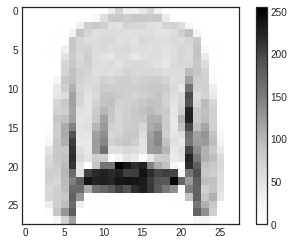

In [35]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

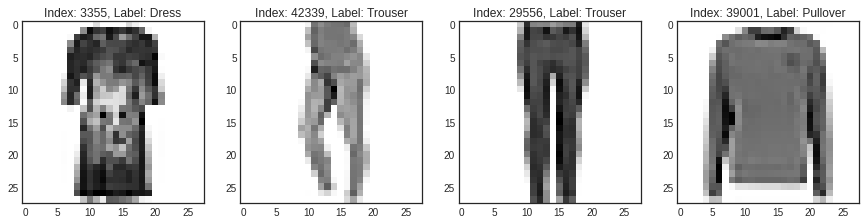

In [36]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title("Index: {}, Label: {}".format(idx, class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- oss='sparse_categorical_crossentropy'

In [37]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

### 모델 구성 (함수형 API)

In [78]:
input = Input(shape=(784, ), name='input')
hidden1 = Dense(256, activation='relu', name='hidden1')(input)
hidden2 = Dense(128, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hidden4')(hidden3)
output = Dense(10, activation='softmax', name='output')(hidden4)
model= Model(inputs=[input], outputs=output)

In [79]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 hidden3 (Dense)             (None, 64)                8256      
                                                                 
 hidden4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainab

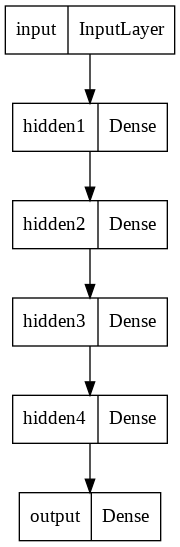

In [80]:
plot_model(model)

### 모델 컴파일

In [81]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [82]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 1.0073 - acc: 0.6888 - val_loss: 0.5867 - val_acc: 0.7797
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5312 - acc: 0.8123 - val_loss: 0.6015 - val_acc: 0.7785
Epoch 3/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4840 - acc: 0.8312 - val_loss: 0.5067 - val_acc: 0.8392
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4582 - acc: 0.8407 - val_loss: 0.5983 - val_acc: 0.7900
Epoch 5/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4603 - acc: 0.8463 - val_loss: 0.5057 - val_acc: 0.8313
Epoch 6/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4493 - acc: 0.8472 - val_loss: 0.6172 - val_acc: 0.7833
Epoch 7/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4538 - acc: 0.8489 - val_loss: 0.6633 - val_acc: 0.7593
Epoch 8/10
329/329 [==============================] - 4s 13ms/step - loss: 0

### 학습 결과 시각화

In [83]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

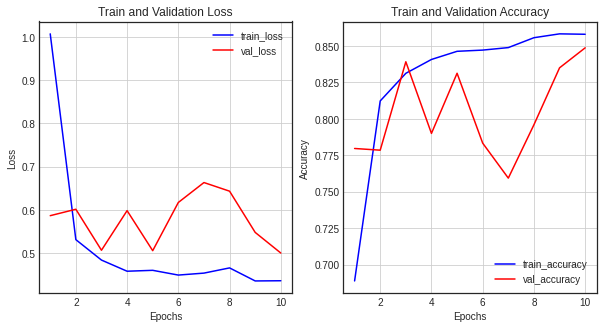

In [84]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_accuracy')
ax2.plot(epochs, val_acc, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [85]:
from tensorflow.keras.optimizers import SGD

In [86]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

In [87]:
history2 = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3358 - acc: 0.8806 - val_loss: 0.4188 - val_acc: 0.8704
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3218 - acc: 0.8842 - val_loss: 0.4364 - val_acc: 0.8628
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3158 - acc: 0.8856 - val_loss: 0.4122 - val_acc: 0.8716
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3112 - acc: 0.8858 - val_loss: 0.4256 - val_acc: 0.8674
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3092 - acc: 0.8855 - val_loss: 0.4130 - val_acc: 0.8718
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3083 - acc: 0.8870 - val_loss: 0.4100 - val_acc: 0.8704
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3062 - acc: 0.8868 - val_loss: 0.4101 - val_acc: 0.8700
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - loss: 0.

In [88]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

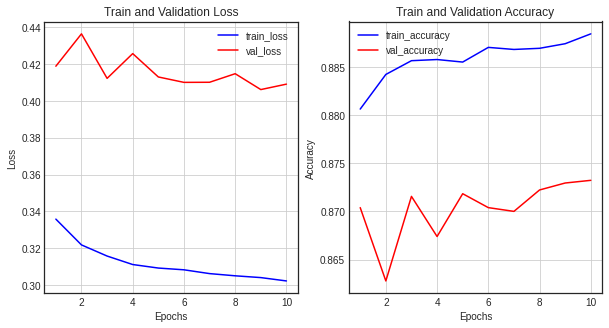

In [94]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_accuracy')
ax2.plot(epochs, val_acc, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [95]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4648 - acc: 0.8651


[0.46483364701271057, 0.8651000261306763]

### 학습된 모델을 통해 값 예측

In [96]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[1.5144913e-13 5.4080640e-25 2.3081220e-20 9.1742922e-19 2.4815143e-25
 1.4059041e-02 3.4662404e-14 2.8975254e-02 6.8110586e-16 9.5696568e-01]


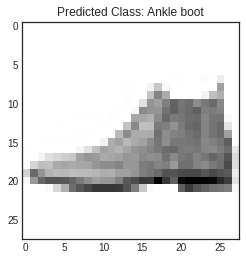

In [98]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0].reshape(-1, 28))
plt.title("Predicted Class: {}".format(class_names[arg_pred_y[0]]))
plt.show()

In [99]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]),
                                       color=color)
  
def plot_value_array(i, pred_ys, true_label):
  pred_ys, true_label = pred_ys[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_ys, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

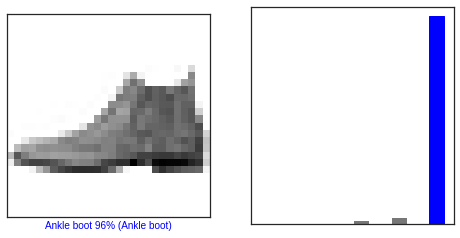

In [100]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

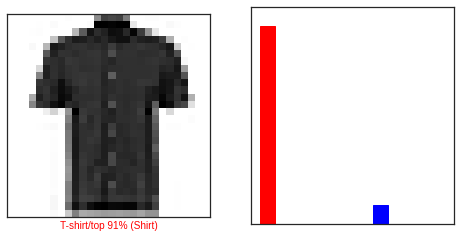

In [105]:
i = 40
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

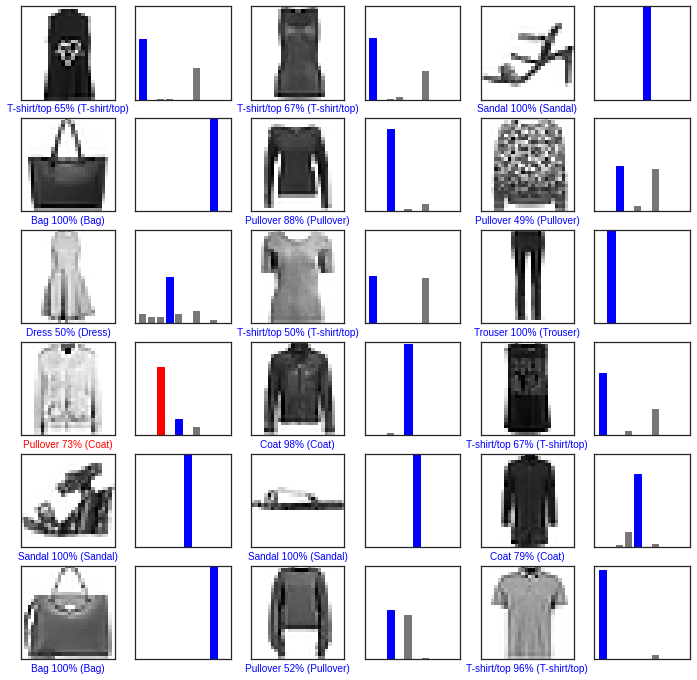

In [106]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [108]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

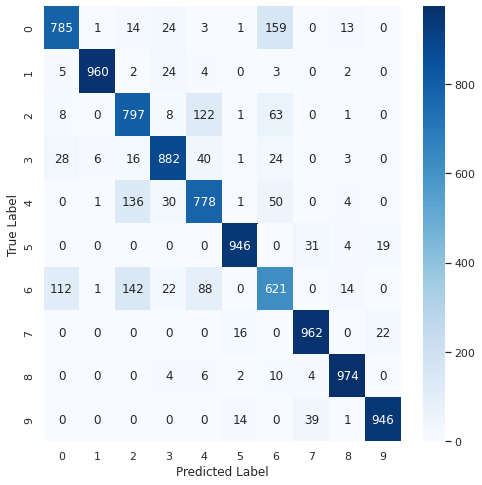

In [109]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [110]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.72      0.80      0.76      1000
           3       0.89      0.88      0.88      1000
           4       0.75      0.78      0.76      1000
           5       0.96      0.95      0.95      1000
           6       0.67      0.62      0.64      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

